In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pyarrow
import sys

f2021 = "IT-NO_2021_hourly.csv"
f2022 = "IT-NO_2022_hourly.csv"
f2023 = "IT-NO_2023_hourly.csv"

dataset1 = pd.read_csv(f2021)
dataset2 = pd.read_csv(f2022)
dataset3 = pd.read_csv(f2023)

In [24]:
dataset = pd.concat([dataset1, dataset2, dataset3], axis=0)

In [25]:
dataset

,Datetime (UTC),Country,Zone Name,Zone Id,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage,Data Source,Data Estimated,Data Estimation Method
0,2021-01-01 00:00:00,Italy,North Italy,IT-NO,303.29,389.74,35.12,30.82,entsoe.eu,False,NaN
1,2021-01-01 01:00:00,Italy,North Italy,IT-NO,303.45,387.76,36.15,33.12,entsoe.eu,False,NaN
2,2021-01-01 02:00:00,Italy,North Italy,IT-NO,295.04,377.86,37.89,33.65,entsoe.eu,False,NaN
3,2021-01-01 03:00:00,Italy,North Italy,IT-NO,295.56,380.36,37.14,32.05,entsoe.eu,False,NaN
4,2021-01-01 04:00:00,Italy,North Italy,IT-NO,308.06,394.66,34.50,31.71,entsoe.eu,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8755,2023-12-31 19:00:00,Italy,North Italy,IT-NO,260.51,333.72,46.38,36.24,entsoe.eu,False,NaN
8756,2023-12-31 20:00:00,Italy,North Italy,IT-NO,265.88,342.93,43.68,32.08,entsoe.eu,False,NaN
8757,2023-12-31 21:00:00,Italy,North Italy,IT-NO,250.60,324.02,47.82,32.64,entsoe.eu,False,NaN
8758,2023-12-31 22:00:00,Italy,North Italy,IT-NO,260.48,337.50,44.98,31.23,entsoe.eu,False,NaN


In [26]:
dataset['Datetime (UTC)'] = pd.to_datetime(dataset['Datetime (UTC)'])

In [27]:
dataset['Datetime (UTC)']

0      2021-01-01 00:00:00
1      2021-01-01 01:00:00
2      2021-01-01 02:00:00
3      2021-01-01 03:00:00
4      2021-01-01 04:00:00
               ...        
8755   2023-12-31 19:00:00
8756   2023-12-31 20:00:00
8757   2023-12-31 21:00:00
8758   2023-12-31 22:00:00
8759   2023-12-31 23:00:00
Name: Datetime (UTC), Length: 26280, dtype: datetime64[ns]

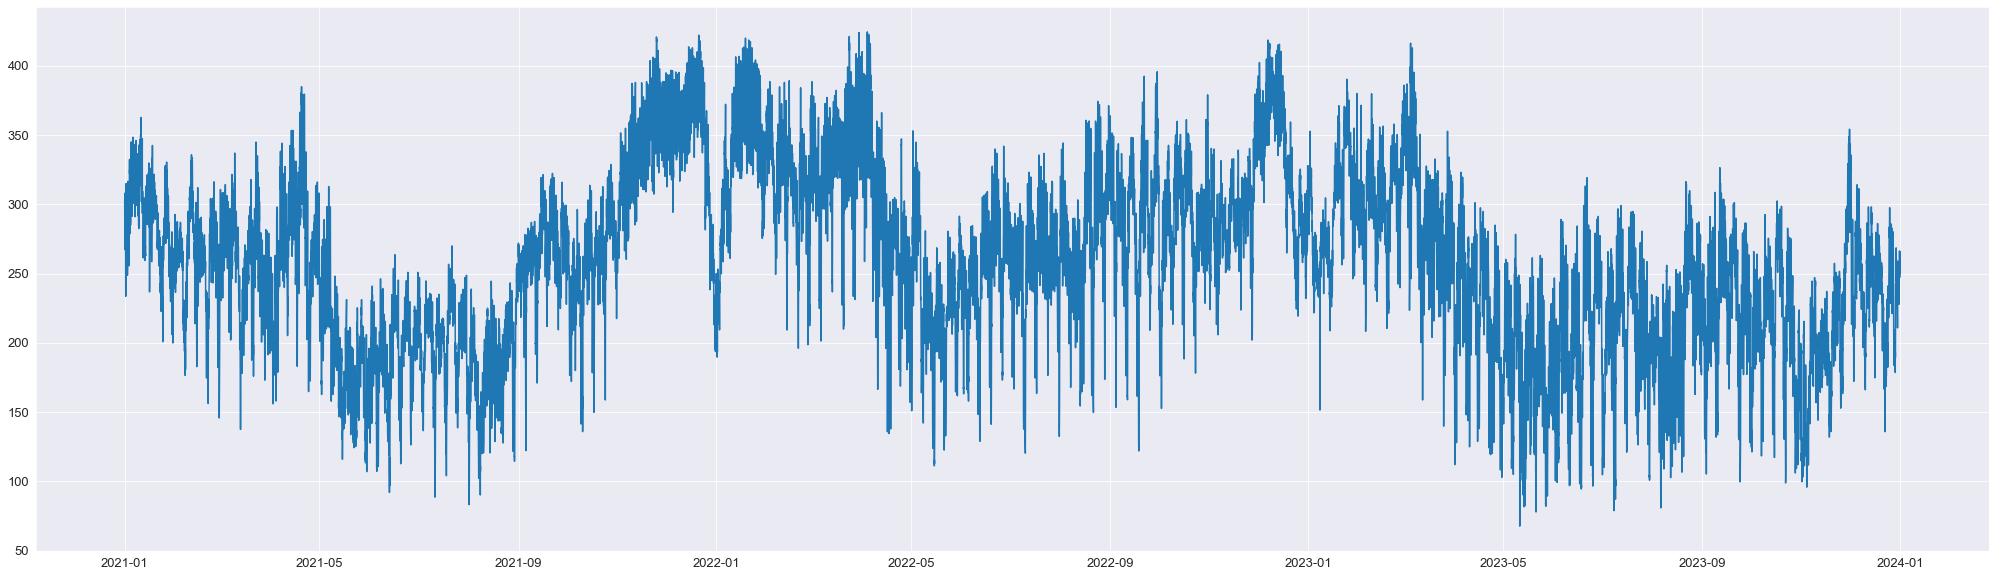

In [28]:
x = dataset['Datetime (UTC)']
y = dataset['Carbon Intensity gCO₂eq/kWh (direct)']

plt.figure(figsize=(35,10))
plt.plot(x,y)

plt.show()

In [29]:
def showplot(x, y, size):
    plt.figure(figsize=size)
    plt.plot(x, y)
    plt.show

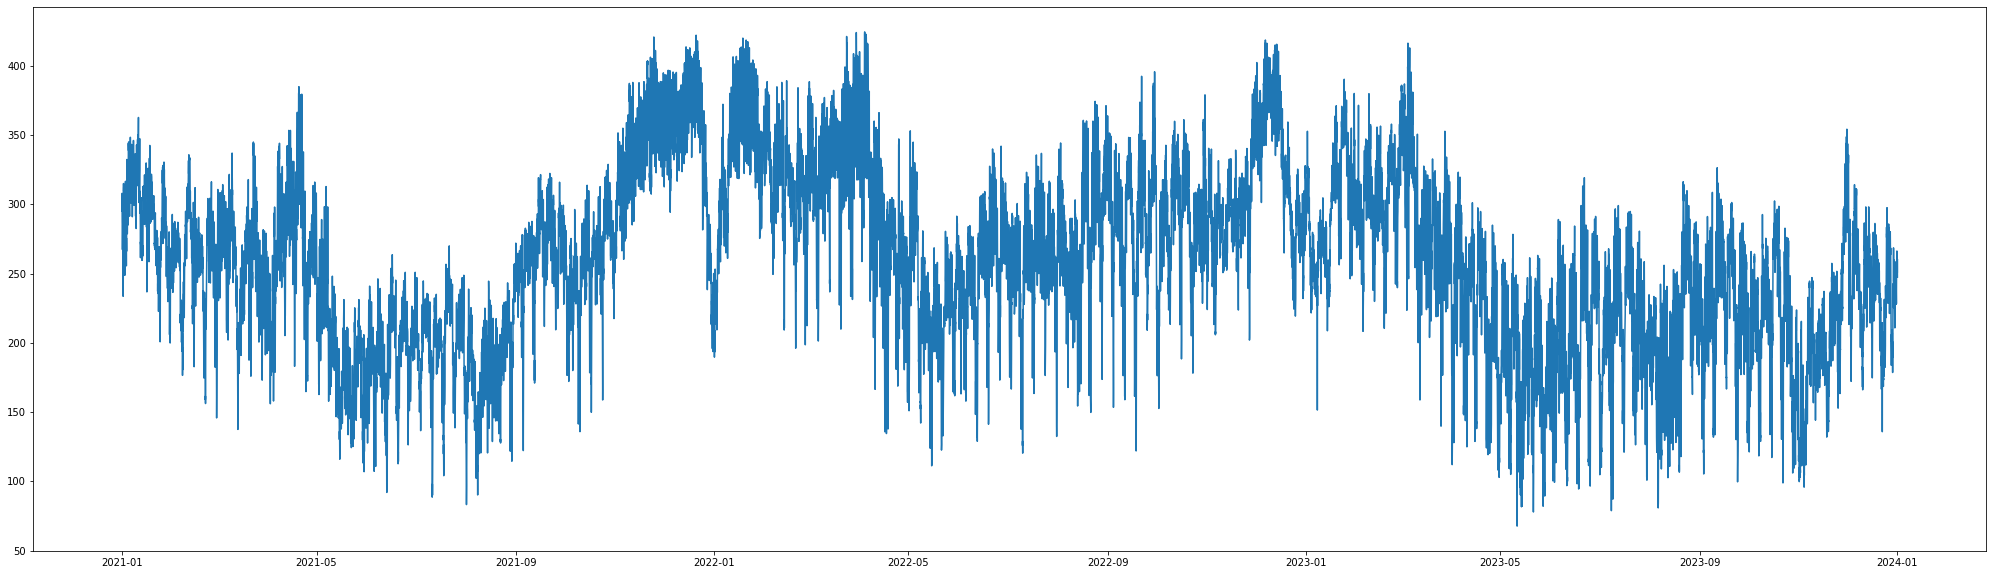

In [8]:
showplot(dataset['Datetime (UTC)'], dataset['Carbon Intensity gCO₂eq/kWh (direct)'], (35, 10))

In [54]:
dataset['LCA+direct'] = dataset['Carbon Intensity gCO₂eq/kWh (LCA)'] + dataset['Carbon Intensity gCO₂eq/kWh (direct)']

In [55]:
dataset['Datetime (UTC)']

0      2021-01-01 00:00:00
1      2021-01-01 01:00:00
2      2021-01-01 02:00:00
3      2021-01-01 03:00:00
4      2021-01-01 04:00:00
               ...        
8755   2023-12-31 19:00:00
8756   2023-12-31 20:00:00
8757   2023-12-31 21:00:00
8758   2023-12-31 22:00:00
8759   2023-12-31 23:00:00
Name: Datetime (UTC), Length: 26280, dtype: datetime64[ns]

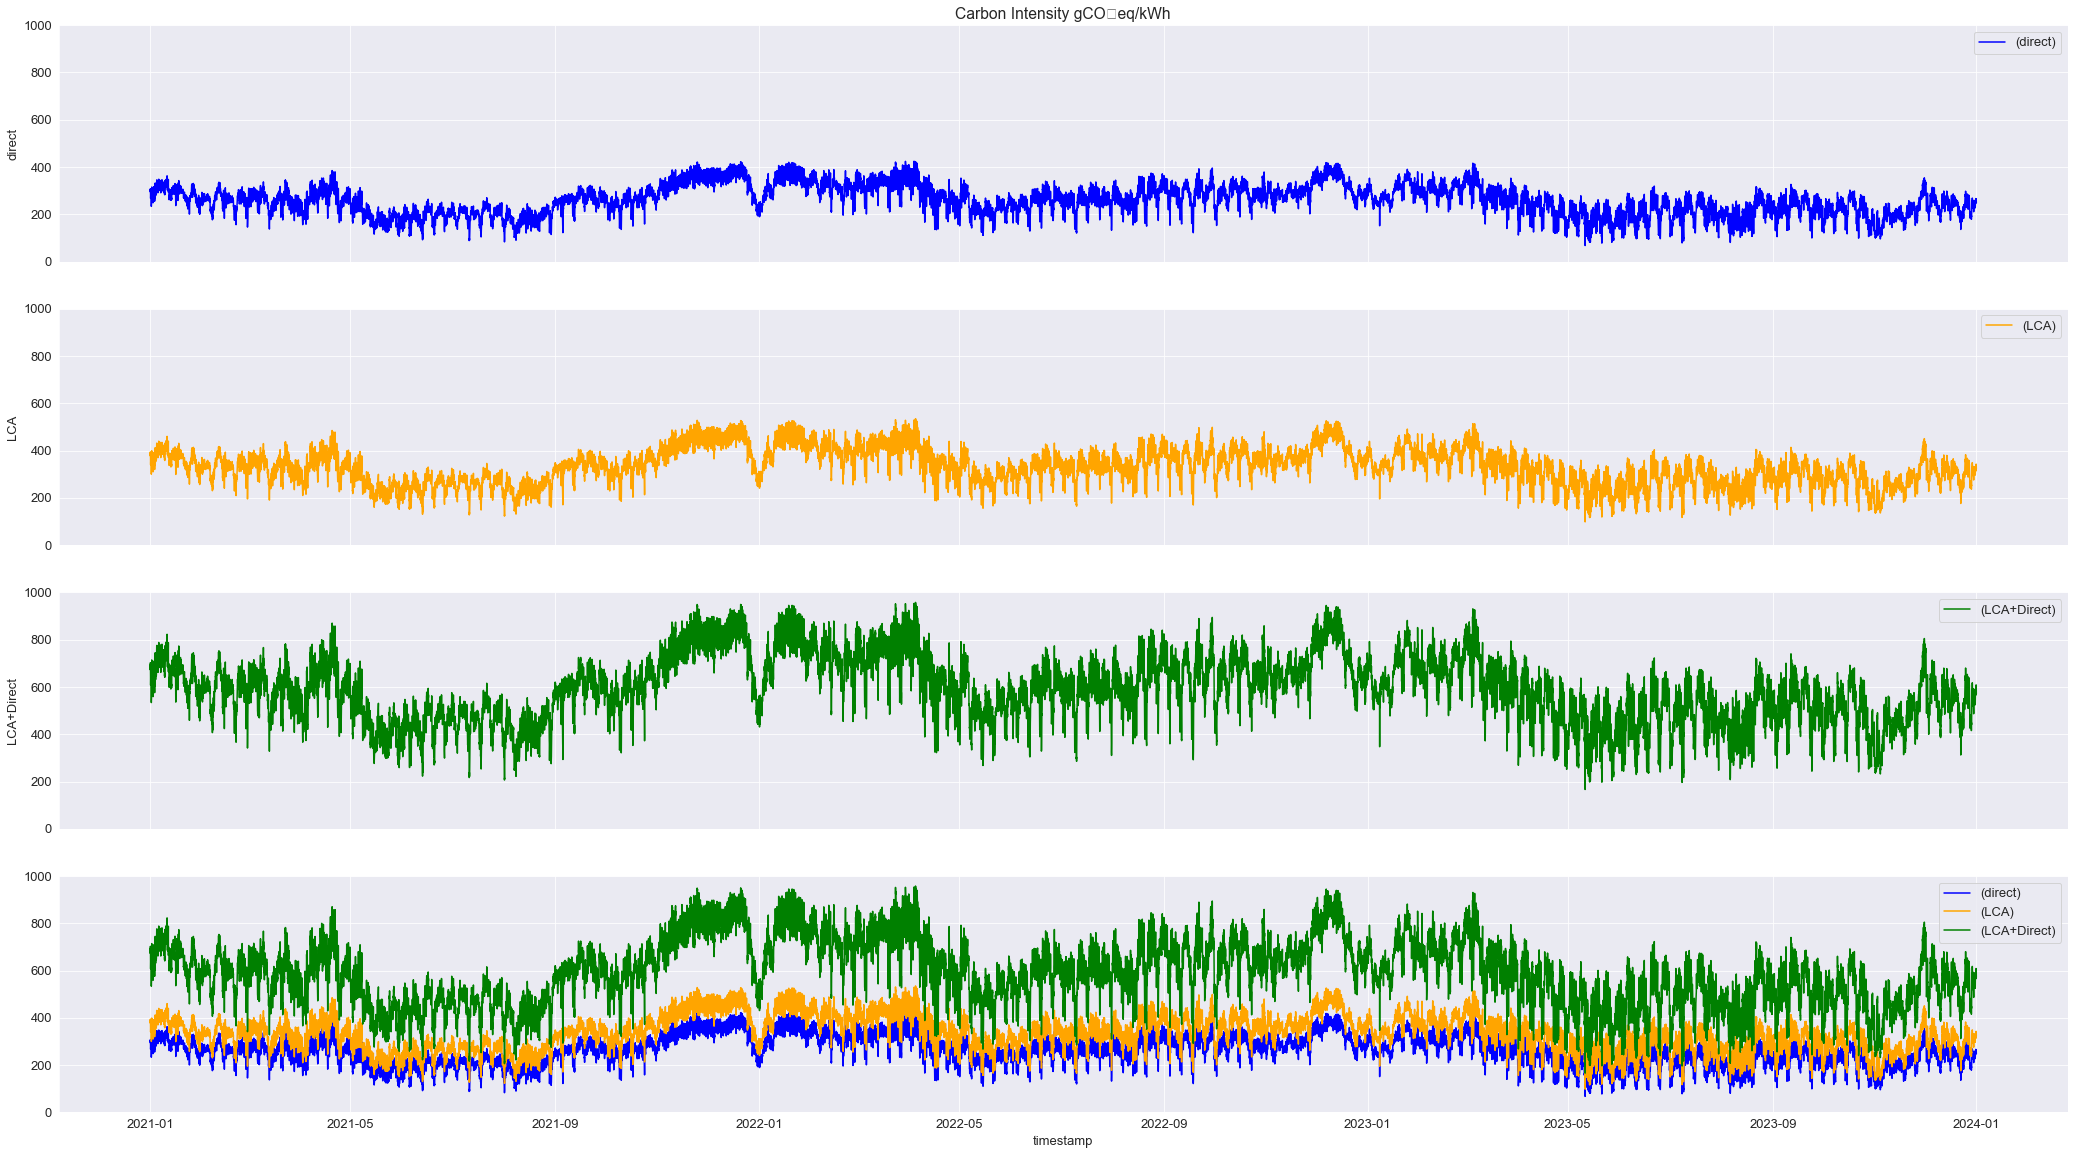

In [56]:
import matplotlib.pyplot as plt
import numpy as np

x = dataset['Datetime (UTC)']
y1 = dataset['Carbon Intensity gCO₂eq/kWh (direct)']
y2 = dataset['Carbon Intensity gCO₂eq/kWh (LCA)']
y3 = dataset['LCA+direct']

# Create subplots with shared X-axis
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(36, 20), sharex=True)

# Plot data on each subplot
ax1.plot(x, y1, 'b', label='(direct)')
ax1.set_ylabel('direct')
ax1.set_title('Carbon Intensity gCO₂eq/kWh')
ax1.set_ylim(0, 1000)

ax2.plot(x, y2, 'orange', label='(LCA)')
ax2.set_ylabel('LCA')
ax2.set_ylim(0, 1000)

ax3.plot(x, y3, 'g', label='(LCA+Direct)')
ax3.set_ylabel('LCA+Direct')
ax3.set_ylim(0, 1000)

ax4.plot(x, y1, 'b', label='(direct)')
ax4.plot(x, y2, 'orange', label='(LCA)')
ax4.plot(x, y3, 'g', label='(LCA+Direct)')
ax4.set_ylim(0, 1000)
ax4.set_xlabel('timestamp')

# Add legends
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

# Show the plot
plt.show()


In [ ]:
#y1 = dataset['Carbon Intensity gCO₂eq/kWh (direct)']
#y2 = dataset['Carbon Intensity gCO₂eq/kWh (LCA)']

In [36]:
dataset['test'] = dataset['Carbon Intensity gCO₂eq/kWh (LCA)'] + dataset['Carbon Intensity gCO₂eq/kWh (direct)']

In [37]:
dataset

,Datetime (UTC),Country,Zone Name,Zone Id,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage,Data Source,Data Estimated,Data Estimation Method,test
0,2021-01-01 00:00:00,Italy,North Italy,IT-NO,303.29,389.74,35.12,30.82,entsoe.eu,False,NaN,693.03
1,2021-01-01 01:00:00,Italy,North Italy,IT-NO,303.45,387.76,36.15,33.12,entsoe.eu,False,NaN,691.21
2,2021-01-01 02:00:00,Italy,North Italy,IT-NO,295.04,377.86,37.89,33.65,entsoe.eu,False,NaN,672.90
3,2021-01-01 03:00:00,Italy,North Italy,IT-NO,295.56,380.36,37.14,32.05,entsoe.eu,False,NaN,675.92
4,2021-01-01 04:00:00,Italy,North Italy,IT-NO,308.06,394.66,34.50,31.71,entsoe.eu,False,NaN,702.72
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023-12-31 19:00:00,Italy,North Italy,IT-NO,260.51,333.72,46.38,36.24,entsoe.eu,False,NaN,594.23
8756,2023-12-31 20:00:00,Italy,North Italy,IT-NO,265.88,342.93,43.68,32.08,entsoe.eu,False,NaN,608.81
8757,2023-12-31 21:00:00,Italy,North Italy,IT-NO,250.60,324.02,47.82,32.64,entsoe.eu,False,NaN,574.62
8758,2023-12-31 22:00:00,Italy,North Italy,IT-NO,260.48,337.50,44.98,31.23,entsoe.eu,False,NaN,597.98


In [9]:
dataset = dataset.rename(columns={'Datetime (UTC)': 'datetime'})
dataset.set_index('datetime', inplace=True)

c:\Users\Baibek\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:270: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Baibek\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:237: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0, flags=flags)


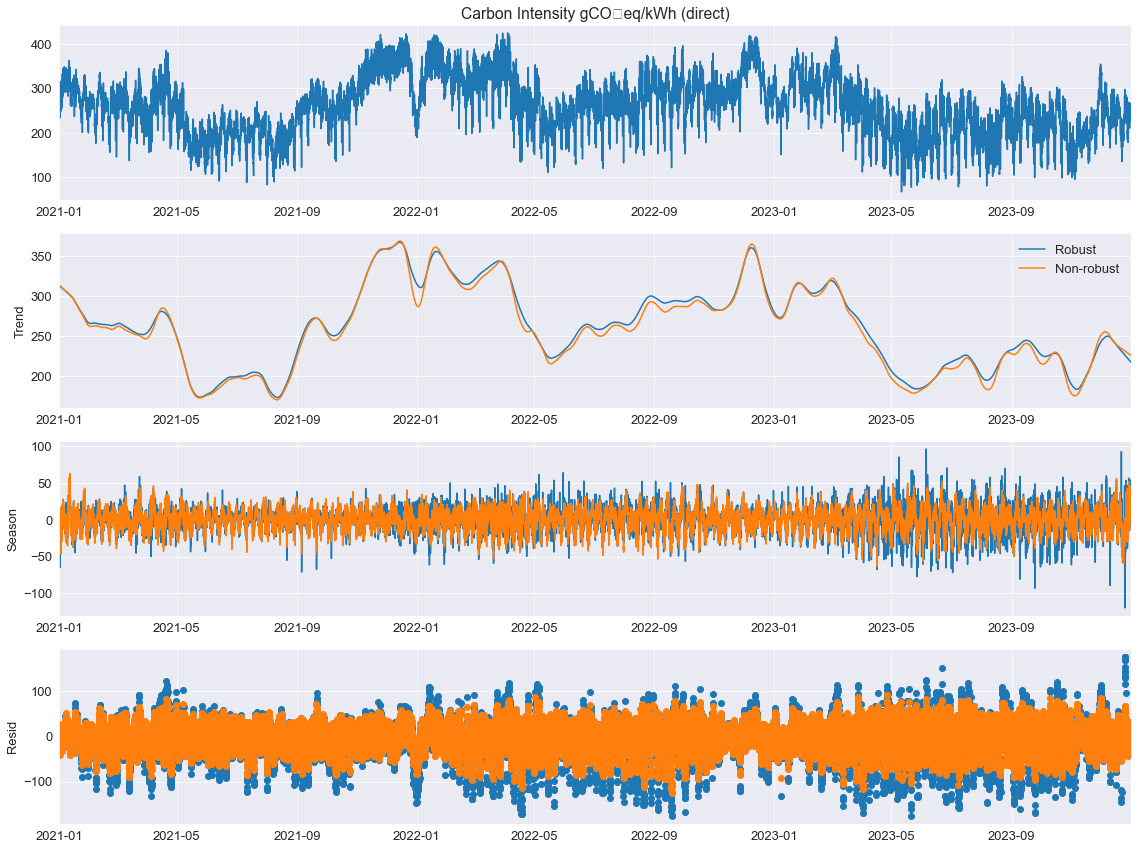

In [10]:

from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL

register_matplotlib_converters()
sns.set_style("darkgrid")

plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)

stl = STL(dataset['Carbon Intensity gCO₂eq/kWh (direct)'], period=365, robust=True)  # the period is set to one day = 24h
res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(dataset['Carbon Intensity gCO₂eq/kWh (direct)'], period=365, robust=False).fit()  # the period is set to one day
add_stl_plot(fig, res_non_robust, ["Robust", "Non-robust"])

c:\Users\Baibek\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:270: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Baibek\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:237: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0, flags=flags)


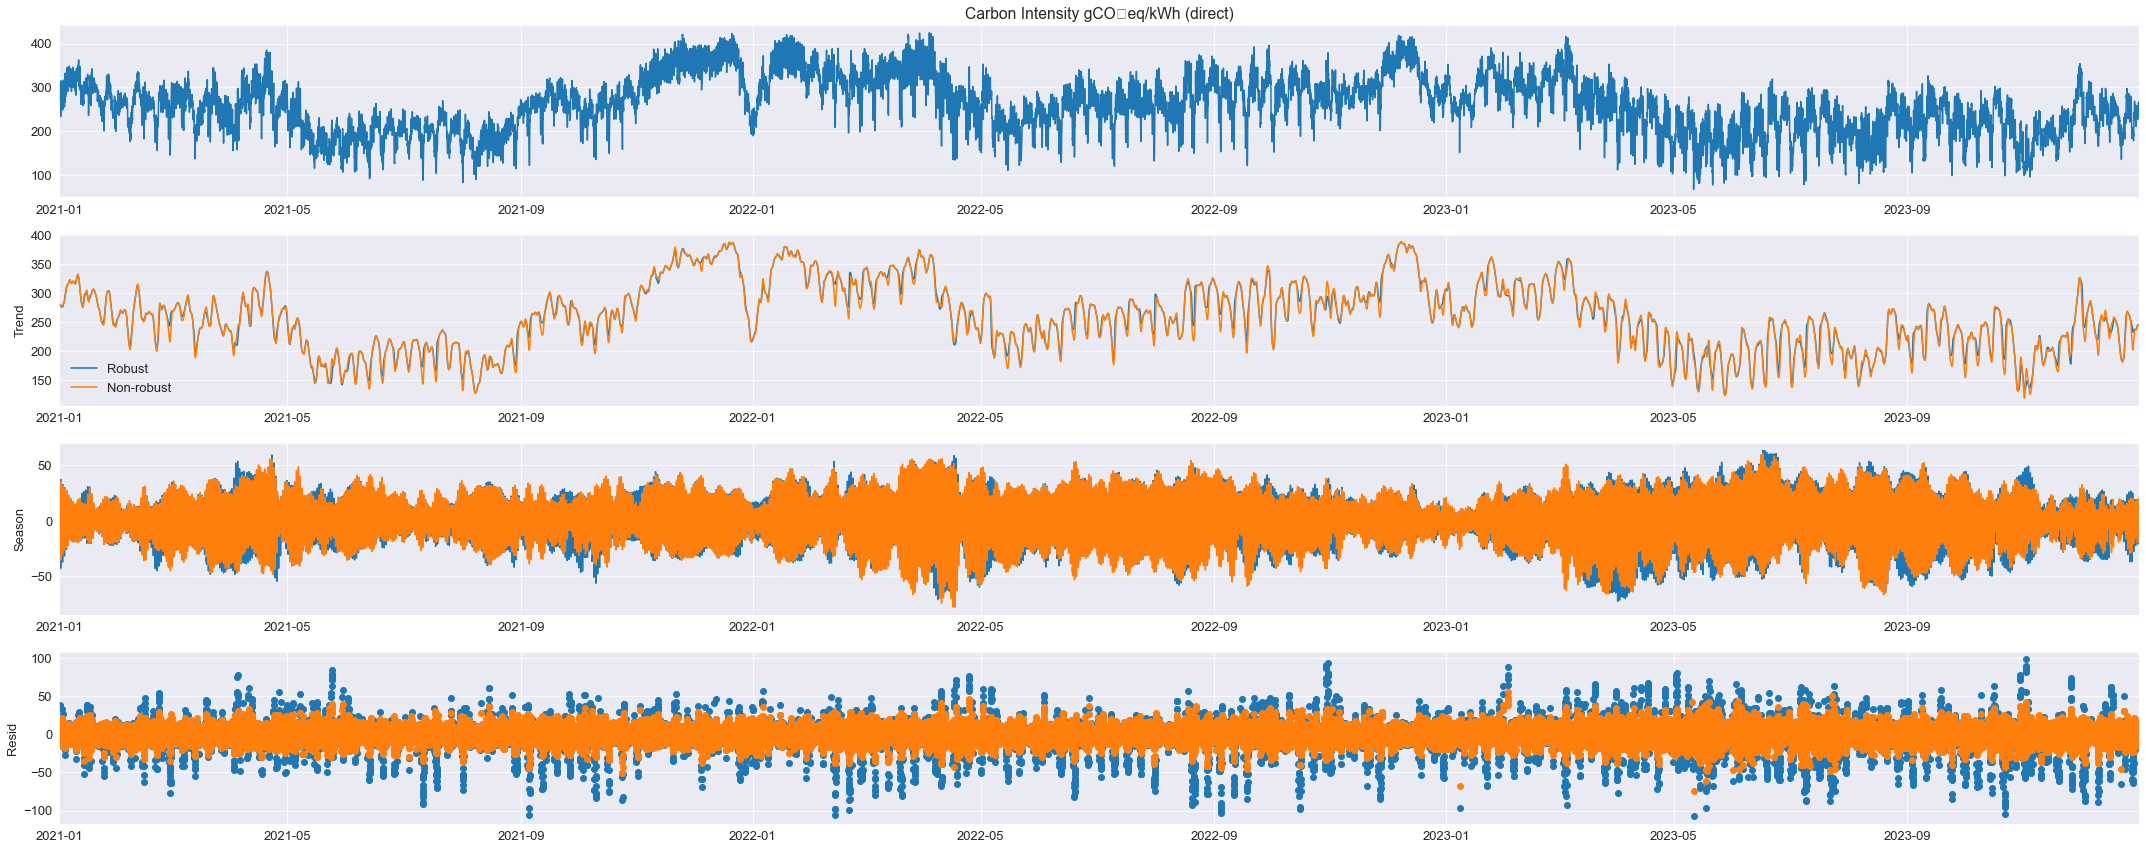

In [13]:

from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL

register_matplotlib_converters()
sns.set_style("darkgrid")

plt.rc("figure", figsize=(30, 12))
plt.rc("font", size=13)

def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)

stl = STL(dataset['Carbon Intensity gCO₂eq/kWh (direct)'], robust=True)  # the period is set to one day = 24h
res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(dataset['Carbon Intensity gCO₂eq/kWh (direct)'], robust=False).fit()  # the period is set to one day
add_stl_plot(fig, res_non_robust, ["Robust", "Non-robust"])

In [14]:
path_P = "totalpower.parquet"
dataset_P = pd.read_parquet(path_P, engine='pyarrow')

In [16]:
dataset_P['node'] = dataset_P['node'].astype(int)

In [19]:
dataset_P

,timestamp,value,node
0,2020-04-01 07:20:00+00:00,440,0
1,2020-04-01 07:20:20+00:00,440,0
2,2020-04-01 07:20:40+00:00,440,0
3,2020-04-01 07:21:00+00:00,440,0
4,2020-04-01 07:21:20+00:00,440,0
...,...,...,...
4750197,2020-04-04 01:11:20+00:00,680,157
4750198,2020-04-04 01:11:40+00:00,680,157
4750199,2020-04-04 01:12:00+00:00,680,157
4750200,2020-04-04 01:12:20+00:00,680,157


In [57]:
dataset_pivoted = pd.pivot_table(dataset_P, index='timestamp', columns='node')

In [58]:
dataset_pivoted

value                                            \
node                         0      1      2      3      4      5      6     
timestamp                                                                    
2020-04-01 07:19:40+00:00    NaN    NaN    NaN    NaN    NaN  400.0    NaN   
2020-04-01 07:20:00+00:00  440.0  400.0  400.0  360.0  440.0    NaN  440.0   
2020-04-01 07:20:20+00:00  440.0  400.0  400.0  360.0  440.0  400.0  440.0   
2020-04-01 07:20:40+00:00  440.0  400.0  420.0  360.0  440.0  400.0  440.0   
2020-04-01 07:21:00+00:00  440.0  400.0  400.0  360.0  440.0  400.0  440.0   
...                          ...    ...    ...    ...    ...    ...    ...   
2020-04-04 16:51:40+00:00  440.0  480.0  420.0  380.0  440.0  480.0  540.0   
2020-04-04 16:52:00+00:00  440.0  480.0  420.0  380.0  440.0  480.0  540.0   
2020-04-04 16:52:20+00:00  440.0  480.0  420.0  380.0  440.0  480.0  540.0   
2020-04-04 16:52:40+00:00  440.0  480.0  420.0  380.0  440.0  480.0  540.0   
2020-04-04 16:53:00+00:00    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                ...                       \
node                         7      8      9    ...    970    971    972   
timestamp                                       ...                        
2020-04-01 07:19:40+00:00    NaN    NaN    NaN  ...    NaN    NaN    NaN   
2020-04-01 07:20:00+00:00  440.0  420.0  420.0  ...  400.0  380.0  400.0   
2020-04-01 07:20:20+00:00  440.0  440.0  420.0  ...  400.0  380.0  400.0   
2020-04-01 07:20:40+00:00  440.0  420.0  420.0  ...  400.0  380.0  400.0   
2020-04-01 07:21:00+00:00  440.0  420.0  420.0  ...  400.0  380.0  400.0   
...                          ...    ...    ...  ...    ...    ...    ...   
2020-04-04 16:51:40+00:00    NaN  520.0  500.0  ...  400.0  380.0    NaN   
2020-04-04 16:52:00+00:00    NaN  520.0  500.0  ...  400.0  380.0  400.0   
2020-04-04 16:52:20+00:00    NaN    NaN    NaN  ...    NaN  380.0    NaN   
2020-04-04 16:52:40+00:00    NaN  520.0  520.0  ...  400.0  380.0  400.0   
2020-04-04 16:53:00+00:00    NaN    NaN    NaN  ...  400.0  380.0  400.0   

                                                                            
node                         973    974    975    976    977    978    979  
timestamp                                                                   
2020-04-01 07:19:40+00:00    NaN  380.0    NaN  380.0    NaN  380.0    NaN  
2020-04-01 07:20:00+00:00  340.0    NaN  380.0  380.0  420.0  380.0  400.0  
2020-04-01 07:20:20+00:00  340.0  380.0  380.0  380.0  420.0  380.0  400.0  
2020-04-01 07:20:40+00:00  340.0  380.0  380.0  380.0  420.0  380.0  400.0  
2020-04-01 07:21:00+00:00  340.0  380.0  380.0  380.0  400.0  380.0  400.0  
...                          ...    ...    ...    ...    ...    ...    ...  
2020-04-04 16:51:40+00:00  340.0    NaN  380.0  380.0  420.0    NaN  400.0  
2020-04-04 16:52:00+00:00  340.0  400.0  380.0  380.0  420.0  380.0  400.0  
2020-04-04 16:52:20+00:00  340.0    NaN    NaN    NaN  420.0  380.0  400.0  
2020-04-04 16:52:40+00:00  360.0  400.0  380.0  380.0  420.0  380.0  400.0  
2020-04-04 16:53:00+00:00    NaN  400.0    NaN  380.0  420.0  380.0  400.0  

[5339 rows x 980 columns]

In [60]:
output_file = 'sample_data.csv'
dataset_pivoted.to_csv(output_file, index=False)